**Orbit Prediction using Keras**

In [ ]:
#import all necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

**Dataset Visualization and Pre-processing**


*   The dataset is first loaded from the csv file
*   It's a good practice to always visulaize the dataset so that you get familiar with it
*   After that, normalization to the dataset was made to speed up training and improve model performance
*   Finally, the data is splitted into train set (80%) and validation set (20%)

In [ ]:
data = pd.read_csv("orbit.csv")
time_steps = data['time_steps'].to_numpy()
y_positions = data['y'].to_numpy()

In [ ]:
scaler = MinMaxScaler()
time_steps = scaler.fit_transform(time_steps.reshape(-1, 1))
y_positions = scaler.fit_transform(y_positions.reshape(-1, 1))

Text(0.5, 1.0, "Scientist's Orbit")

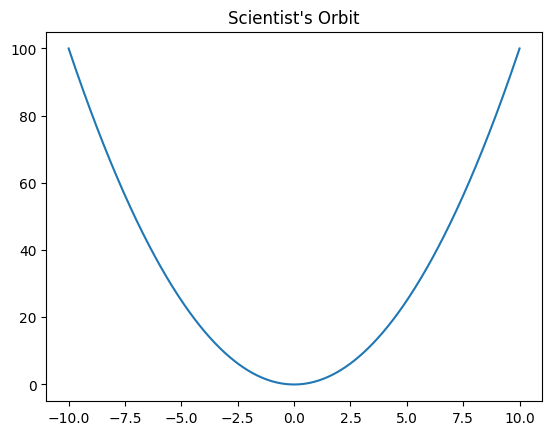

In [ ]:
plt.plot(time_steps, y_positions) #plot the dataset
plt.title("Scientist's Orbit")

In [ ]:
from sklearn.model_selection import train_test_split
#Splitting Data
X_train, X_val, y_train, y_val = train_test_split(time_steps, y_positions, test_size=0.2, random_state=42)

**Model Creation**


*   The model architecture is made of an input layer, 5 hidden layers, and an output layer.
*   When calculating the parameters in the model it's a total of 11,256 parameter as shown in the summary (The parameters are weights and biases)
*   The loss is made using Mean Absolute Error and adam optimizer using the default learning rate which is 0.001



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, input_shape=(1, ), activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(1))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_129 (Dense)                    │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_130 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_131 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_132 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_133 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_134 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,265 (44.00 KB)

 Trainable params: 11,265 (44.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.optimizers import Adam
# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mae')

**Model Training**

In [ ]:
# Model Training
history = model.fit(time_steps, y_positions, epochs=300)


print('Training started..., this can take a while:')



Epoch 1/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2734
Epoch 2/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2471
Epoch 3/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2482
Epoch 4/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1911
Epoch 5/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0315
Epoch 6/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0137
Epoch 7/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0086
Epoch 8/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0162
Epoch 9/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061
Epoch 10/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0080
Epoch 11/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0089
Epoch 12/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0090
Epoch 13/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0101
Epoch 14/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0057
Epoch 15/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0089
Epoc

**Model Evaluation**

In [ ]:
#Evaluation using val set
val_loss = model.evaluate(X_val, y_val)
print(f'Validation loss: {val_loss}')

y_pred = model.predict(X_val)
r2 = r2_score(y_val, y_pred)
print(f'R2 score: {r2}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0023  
Validation loss: 0.002414501504972577
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
R2 score: 0.9998856798368085


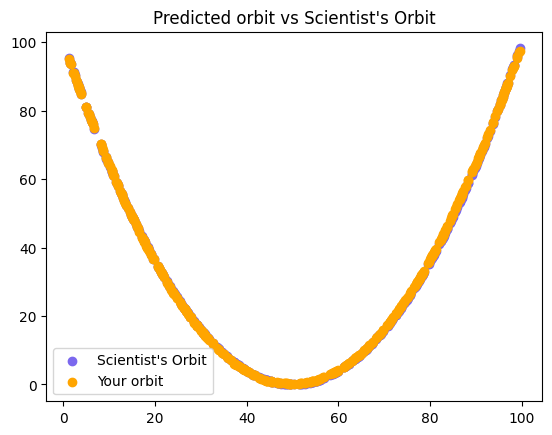

In [ ]:
# Show the scientist's true orbit values and the model's predictions of the orbit values wrt time
def plot_output(x_val, y_val,model_preds):
  plt.scatter(scaler.inverse_transform(x_val), scaler.inverse_transform(y_val), color="mediumslateblue")
  plt.scatter(scaler.inverse_transform(x_val), scaler.inverse_transform(model_preds), color="orange")
  plt.legend(["Scientist's Orbit", 'Your orbit'],loc="lower left")
  plt.title("Predicted orbit vs Scientist's Orbit")

plot_output(X_val, y_val,y_pred)


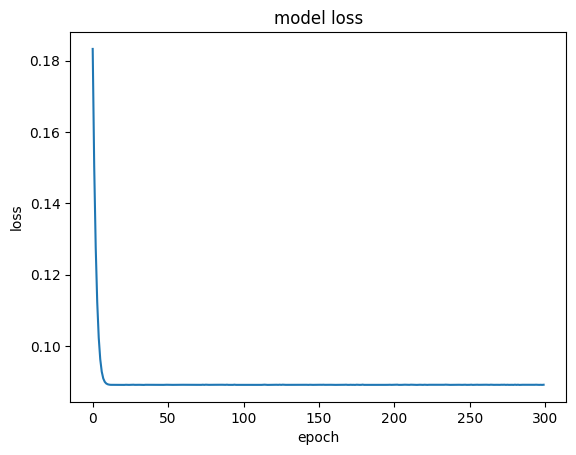

In [ ]:
# Visulization of model loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()